<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/module_3/ds_mod3_lecture5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from sklearn.metrics import mean_absolute_error
from pandas.plotting import autocorrelation_plot
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from datetime import date
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rcParams['font.size'] = 14
mpl.rcParams['figure.figsize'] = (15,9)

url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'
dados = pd.read_csv(url, sep=";", parse_dates=[4])
dados_sp = dados.query("nome_munic == 'São Paulo'")
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()
dados_sp.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,obitos_novos,obitos_pc,obitos_mm7d,letalidade,nome_ra,cod_ra,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,media_movel_casos,media_movel_obitos
562,São Paulo,3550308,25,2,2020-02-25,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,NaN,NaN,NaN,NaN
1207,São Paulo,3550308,26,2,2020-02-26,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
1852,São Paulo,3550308,27,2,2020-02-27,1,0,"8,424841e-03","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,0.0,0.0,NaN,NaN
2497,São Paulo,3550308,28,2,2020-02-28,2,1,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,1.0,0.0,NaN,NaN
3142,São Paulo,3550308,29,2,2020-02-29,2,0,"1,684968e-02","0,0000000",0,0,"0,000000e+00","0,0000000","0,0000000000",RM de São Paulo,10,Grande São Paulo,10,11869660,1853286,152111,<50,7.0,"-23,5329","-46,6395",9,-1.0,0.0,NaN,NaN


In [2]:
feriados_sp_2020= [
'2020-02-25',
'2020-02-26',
'2020-04-10',
'2020-04-21',
'2020-05-01',
'2020-05-20',
'2020-05-21',
'2020-05-22',
'2020-05-25',
'2020-06-11',
'2020-09-07',
'2020-10-12',
'2020-11-02',
'2020-11-15',
'2020-12-25'
]

feriados_sp_2021= [
'2021-01-01',
'2021-01-25',
'2021-02-15',
'2021-02-16',
'2021-02-17',
'2021-03-26',
'2021-03-29',
'2021-03-30',
'2021-03-31',
'2021-04-01',
'2021-04-02',
'2021-4-21',
'2021-05-01'
]
feriados_sp_2020 = pd.DataFrame({
    'holiday' : 'sp_2020',
    'ds' : pd.to_datetime(feriados_sp_2020)
})
feriados_sp_2021 = pd.DataFrame({
    'holiday' : 'sp_2021',
    'ds' : pd.to_datetime(feriados_sp_2021)
})
feriados = pd.concat((feriados_sp_2020, feriados_sp_2021))

In [3]:
cut = 400
x='datahora'
y='casos_novos'
xlabel='Data'
ylabel='Casos novos'
df = pd.DataFrame()
df['ds'] = dados_sp[x][:cut]
df['y'] = dados_sp[y][:cut]
df_teste = pd.DataFrame()
df_teste['ds'] = dados_sp[x][cut:]
df_teste['y'] = dados_sp[y][cut:]

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


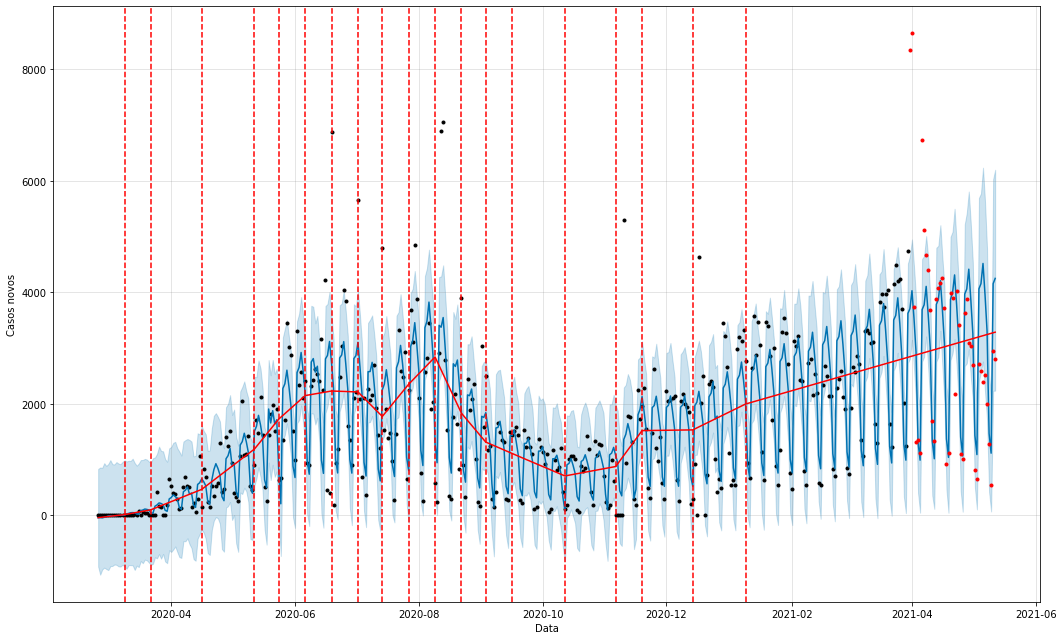

In [4]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df)
dataframefuturo_feriados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo_feriados)
fig = modelo_feriados.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(15,9), )
plt.plot(df_teste['ds'], df_teste['y'], '.r')
add_changepoints_to_plot(fig.gca(), modelo_feriados, previsao)
plt.show()

In [5]:
novo_y = df.reset_index()
novo_y.head()

,index,ds,y
0,562,2020-02-25,0
1,1207,2020-02-26,0
2,1852,2020-02-27,0
3,2497,2020-02-28,1
4,3142,2020-02-29,0


In [6]:
sem_outliers = novo_y[(novo_y['y'] > previsao['yhat_lower'][:400]) & (novo_y['y'] < previsao['yhat_upper'][:400])]

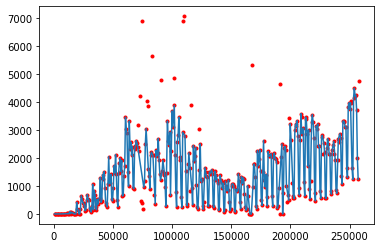

In [7]:
plt.plot(df.index, df['y'], 'r.')
plt.plot(sem_outliers['index'], sem_outliers['y'])

In [8]:
df_sem_outliers = sem_outliers[['ds', 'y']]
df_sem_outliers.head()

,ds,y
0,2020-02-25,0
1,2020-02-26,0
2,2020-02-27,0
3,2020-02-28,1
4,2020-02-29,0


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


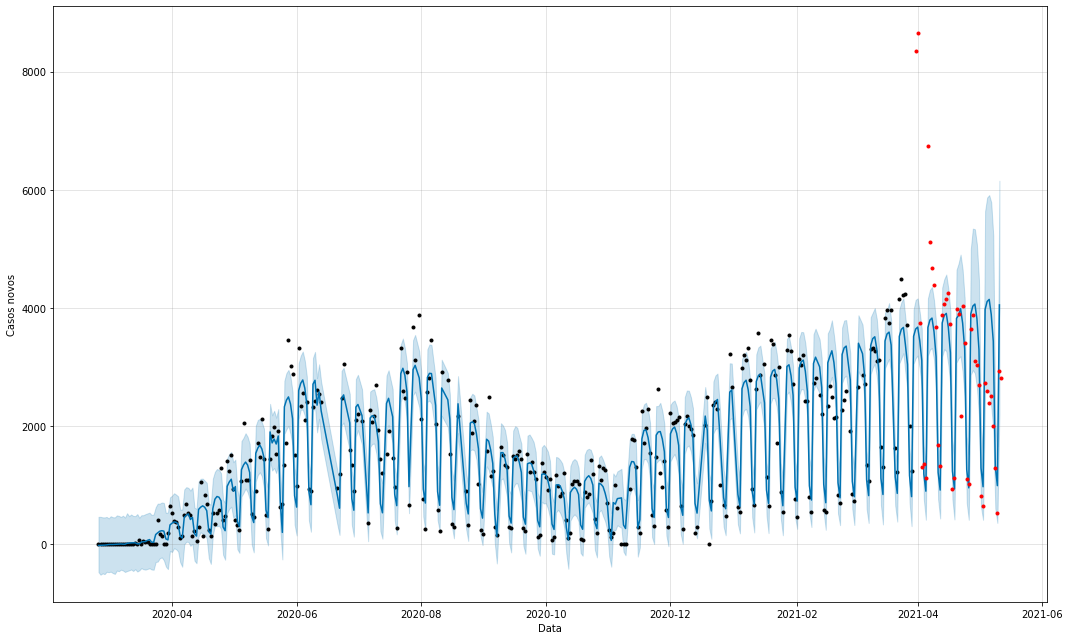

In [9]:
modelo_feriados = Prophet(changepoint_prior_scale=10.0, holidays=feriados, seasonality_mode='multiplicative')
modelo_feriados.fit(df_sem_outliers)
dataframefuturo_feriados = modelo_feriados.make_future_dataframe(periods=43)
previsao = modelo_feriados.predict(dataframefuturo_feriados)
fig = modelo_feriados.plot(previsao, xlabel=xlabel, ylabel=ylabel, figsize=(15,9), )
plt.plot(df_teste['ds'], df_teste['y'], '.r')
# add_changepoints_to_plot(fig.gca(), modelo_feriados, previsao)
# plt.show()

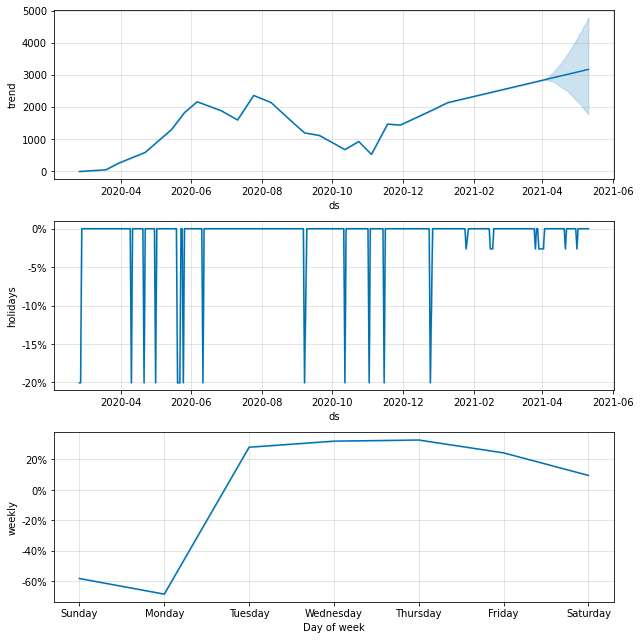

In [10]:
modelo_feriados.plot_components(previsao);

In [11]:
amostras = modelo_feriados.predictive_samples(previsao)

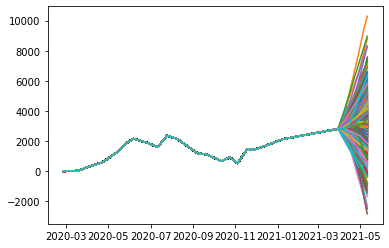

In [12]:
plt.plot(previsao['ds'], amostras['trend']);

In [13]:
from fbprophet.diagnostics import cross_validation

In [14]:
df_cv = cross_validation(modelo_feriados, horizon='30 days', initial='180 days', period='30 days')

INFO:fbprophet:Making 7 forecasts with cutoffs between 2020-08-31 00:00:00 and 2021-02-27 00:00:00


In [15]:
janela = 5
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
df_cv_cut.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
137,2021-01-29,3176.600646,2792.350309,3615.206874,3267,2021-01-28
138,2021-01-30,2883.591255,2460.077501,3325.424932,2721,2021-01-28
139,2021-01-31,998.923983,571.002092,1417.020240,764,2021-01-28
140,2021-02-01,756.567857,329.615450,1193.228788,468,2021-01-28
141,2021-02-02,3378.318454,2956.350799,3812.760705,3138,2021-01-28


Text(0.5, 0, 'ds')

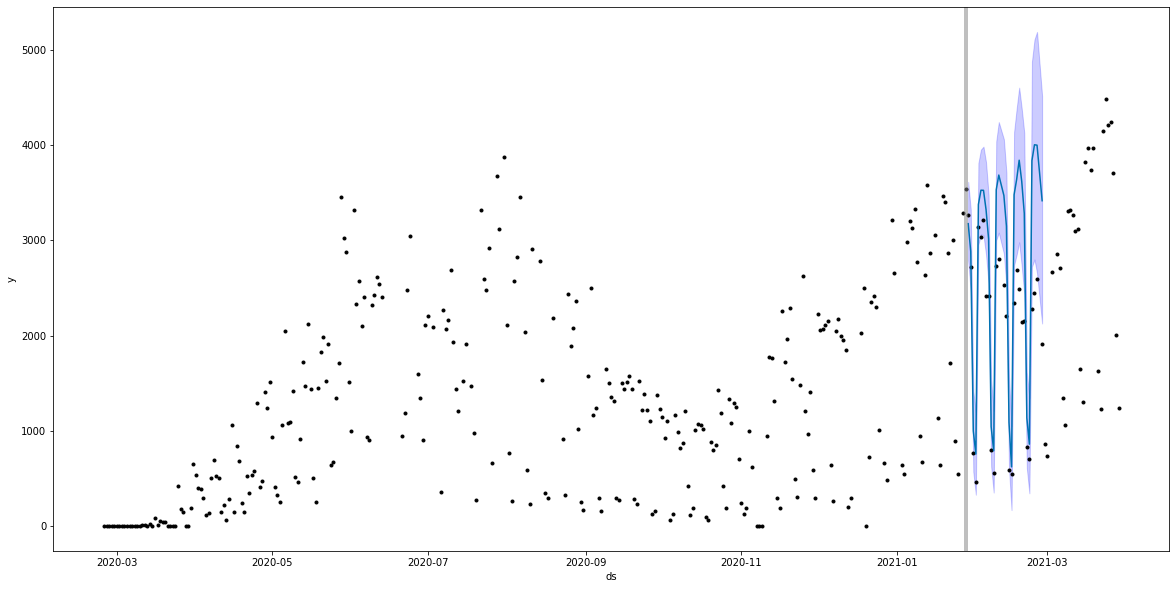

In [16]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

In [17]:
from fbprophet.diagnostics import performance_metrics

In [18]:
df_p = performance_metrics(df_cv)
df_p.head()

INFO:fbprophet:Skipping MAPE because y close to 0


,horizon,mse,rmse,mae,mdape,coverage
0,4 days,135748.892088,368.441165,292.584844,0.208870,0.780702
1,5 days,126560.877212,355.753956,292.621974,0.218757,0.827068
2,6 days,146956.526662,383.349092,319.343368,0.218757,0.789474
3,7 days,88767.354326,297.938508,251.074249,0.127627,0.894737
4,8 days,178459.165010,422.444274,348.871669,0.169210,0.684211


In [19]:
from fbprophet.plot import plot_cross_validation_metric

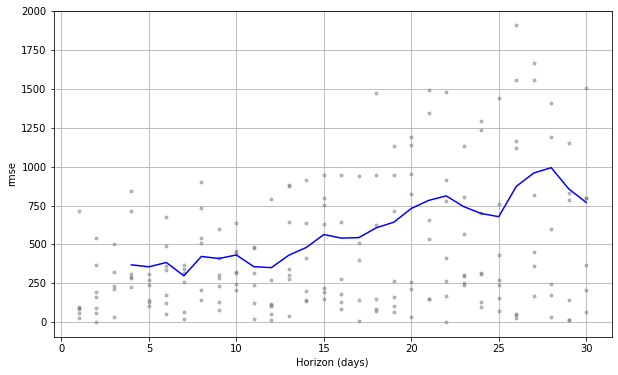

In [20]:
plot_cross_validation_metric(df_cv, metric='rmse');

Text(0.5, 0, 'ds')

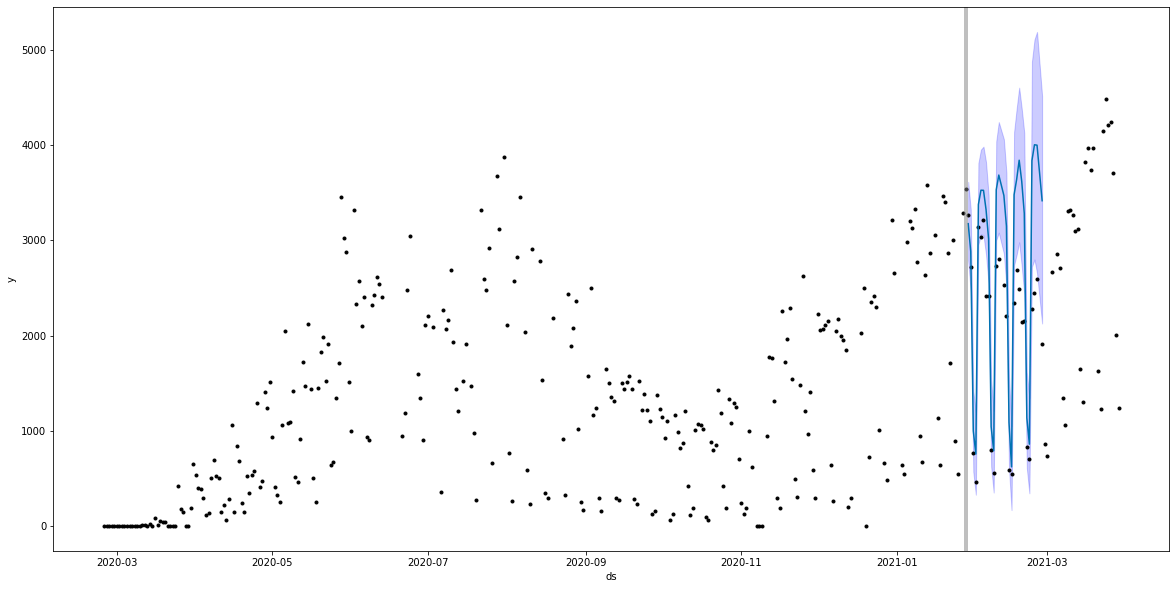

In [21]:
janela = 5
cutoff = df_cv['cutoff'].unique()[janela]
df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
df_cv_cut.head()

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                df_cv_cut['yhat_upper'], color='blue',
                                alpha=0.2)
ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
ax.set_ylabel('y')
ax.set_xlabel('ds')

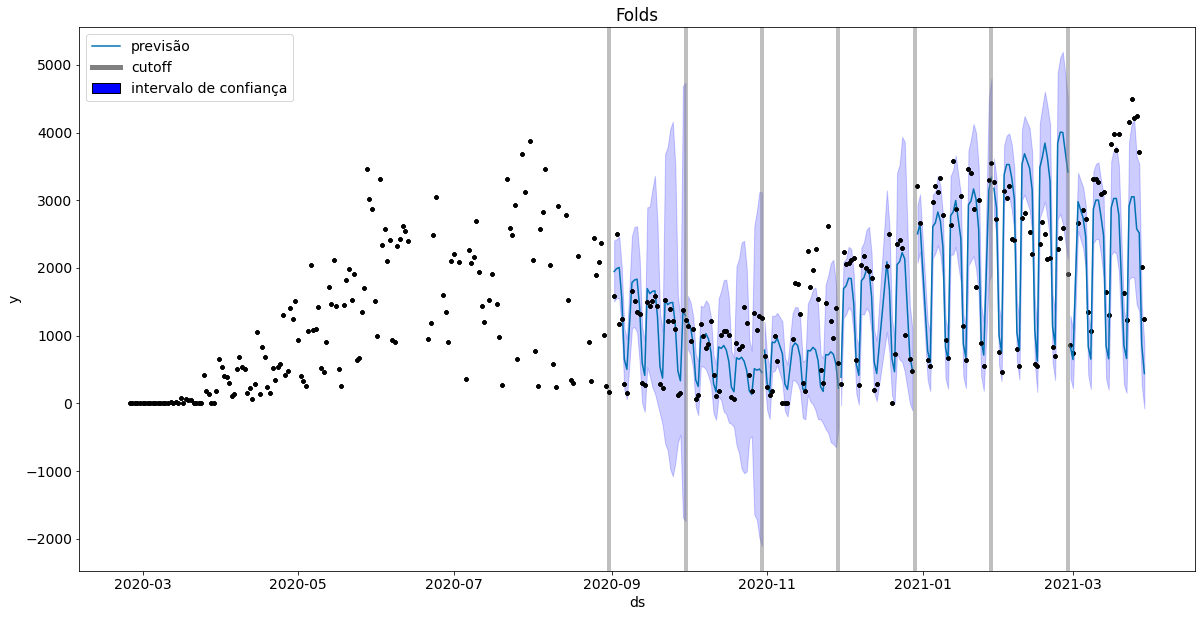

In [40]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
for cutoff in df_cv['cutoff'].unique():
  # cutoff = df_cv['cutoff'].unique()[janela]
  df_cv_cut = df_cv[df_cv['cutoff'].values == cutoff]
  # df_cv_cut.head()
  ax.plot(modelo_feriados.history['ds'].values, modelo_feriados.history['y'], 'k.')
  ax.plot(df_cv_cut['ds'].values, df_cv_cut['yhat'], ls='-', c='#0072B2')
  ax.fill_between(df_cv_cut['ds'].values, df_cv_cut['yhat_lower'],
                  df_cv_cut['yhat_upper'], color='blue', alpha=0.2)
  ax.axvline(x=pd.to_datetime(cutoff), c='gray', lw=4, alpha=0.5)
plt.title(f'Folds')
ax.set_ylabel('y')
ax.set_xlabel('ds')
prev = Line2D(range(1), range(1), color="#0072B2", markerfacecolor="red", label="previsão")
ctf = Line2D(range(1), range(1), color="gray", markerfacecolor="red", linewidth=5.0, label="cutoff")
ci = mpatches.Patch(facecolor='blue', edgecolor='k', label="intervalo de confiança")
plt.legend(handles=[prev, ctf, ci])
plt.show()

# Desafios

## Desafio 13: Testar diferentes intervalos de confiança.

## Desafio 14: Buscar quais métricas se aplicam a quais casos.